In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # We only take the first two features
y = iris.target

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
print(f'Training set accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {clf.score(X_test, y_test):.4f}')

Training set accuracy: 0.8393
Test set accuracy: 0.7632


In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, class_names, 
                             colors=['r', 'c', 'b'], markers=('s', 'o', '^')):  
    cmap = ListedColormap(colors)
      
    # Create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # Find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # Put the result into a color plot  
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

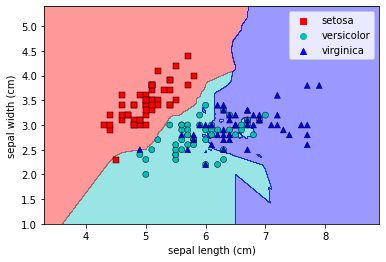

In [16]:
plot_decision_boundaries(clf, X, y, iris.feature_names, iris.target_names)
plt.savefig('figures/iris_5_neighbors.pdf')

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')